<a href="https://colab.research.google.com/github/ttb-git/Berkeley-Engr-PracticalAssignment3/blob/main/Practical_Application_III_TB_1_FeatureEngr_Modelling_Classification_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
# Importing modules and libraries

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import sklearn.manifold

import os

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Berkeley-Engineering-Projects/module_17_starter/data/bank-additional-full.csv', sep = ';')

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
print(data["campaign"].value_counts())

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,56,57,37,40,56,45,59,41,24,25,...,62,64,36,37,29,73,46,56,44,74
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,...,retired,retired,admin.,admin.,unemployed,retired,blue-collar,retired,technician,retired
marital,married,married,married,married,married,married,married,married,single,single,...,married,divorced,married,married,single,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,...,university.degree,professional.course,university.degree,university.degree,basic.4y,professional.course,professional.course,university.degree,professional.course,professional.course
default,no,unknown,no,no,no,unknown,no,unknown,no,no,...,no,no,no,no,no,no,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,...,no,yes,no,yes,yes,yes,no,yes,no,yes
loan,no,no,no,no,yes,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,...,thu,fri,fri,fri,fri,fri,fri,fri,fri,fri


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
print(data["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


####From the above distribution we can be sure that the data is imbalanced, as the number of "no"s are also 8 times the number of "yes"

In [ ]:
 print(data["job"].value_counts())
 print("*"*25)
 print(data["marital"].value_counts())
 print("*"*25)
 print(data["education"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
*************************
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
*************************
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


#EDA (Exploratory Data Analysis)
* Next, Let's dig deeper into the data by performing EDA

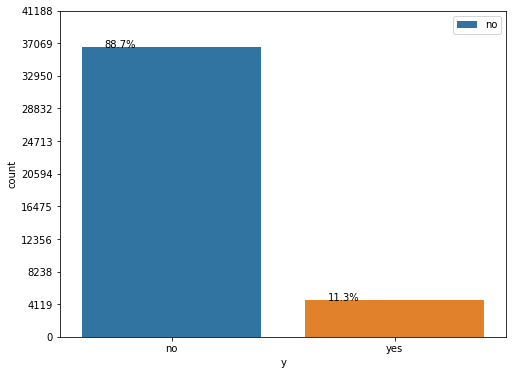

In [ ]:
# I am going to look at the distribution of class variables

plt.figure(figsize=(8,6))
Y = data["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=data)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#puting 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjusting the ticklabel to the desired format, without changing the position of the ticks. ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total)) ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(labels=["no","yes"])
plt.show()

In [ ]:
#Univariate Analysis

def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#I am going to put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#I am going to adjust the ticklabel to the desired format, without changing the position of the ticks. ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total)) ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(labels=["no","yes"])
plt.show()

In [ ]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(22,15))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#puting 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjusting the ticklabel to the desired format, without changing the position of the ticks. ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total)) ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.legend(labels=["no","yes"])
plt.show()

###Feature = Job (Categorical variable)

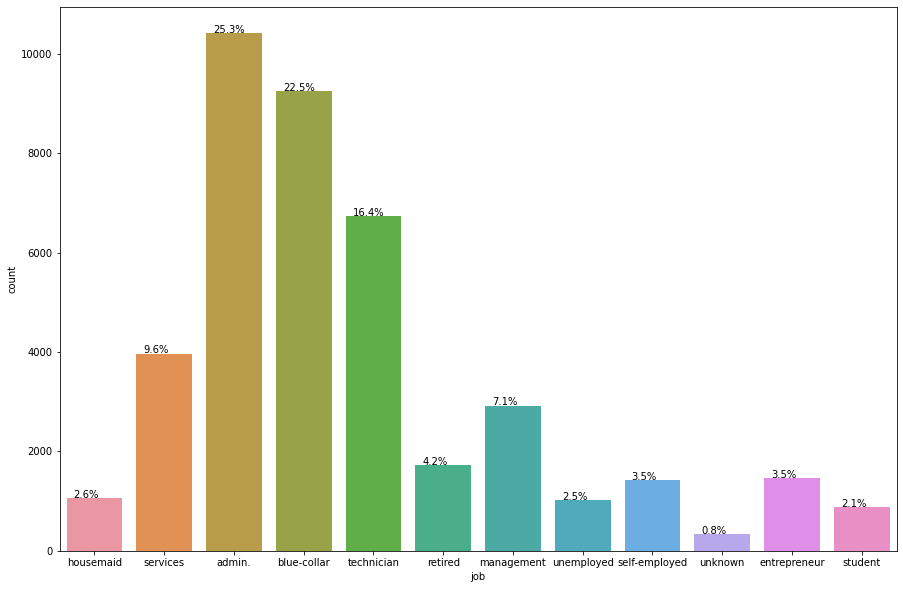

In [ ]:
countplot("job", data)

####From the above distribution graph we can see that most of the customers have jobs as "admin", "blue-collar" or "technician". One interesting thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin have subscribed a term deposit.

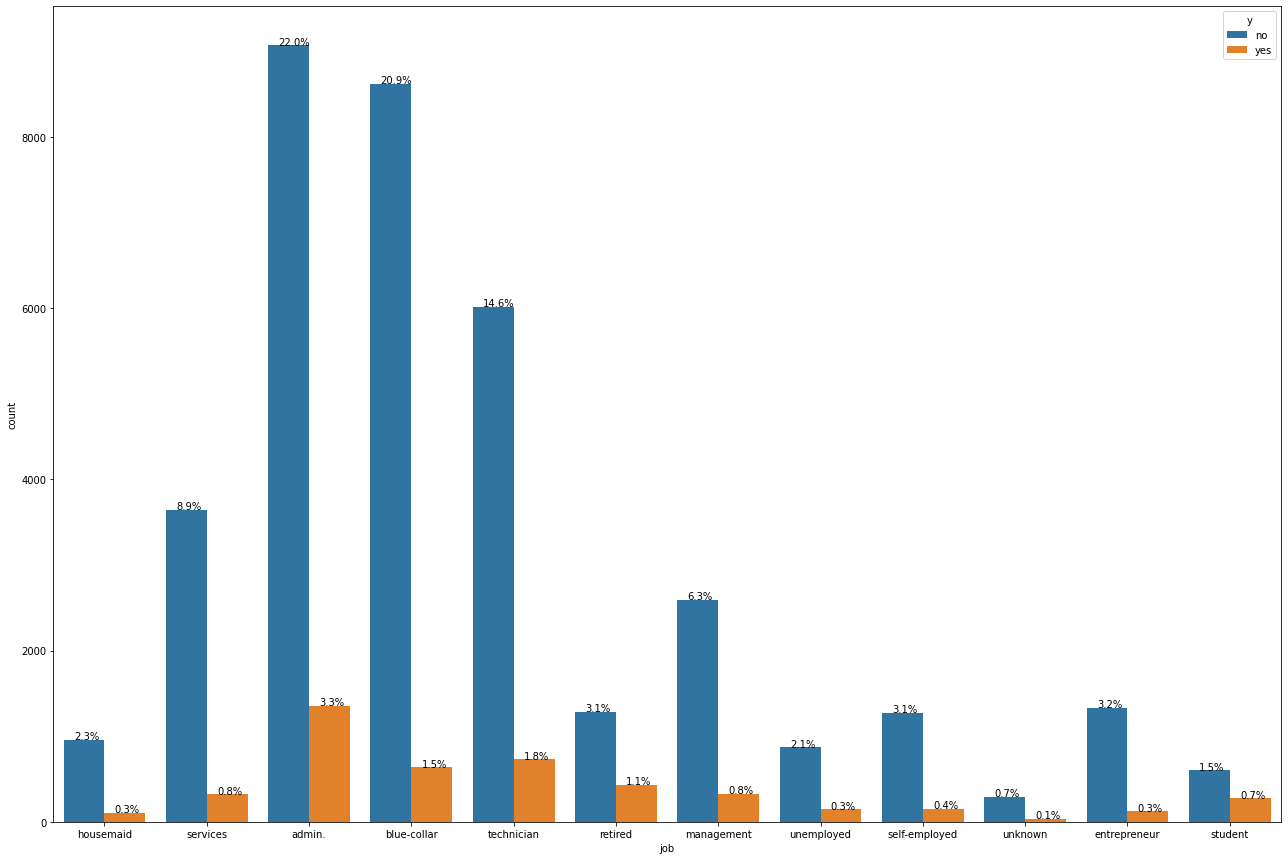

In [ ]:
countplot_withY("job", data)

####From the above plot, we can see that the customers whoes job function is admin are the ones with the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.
We can find out the odds or ratio of subscribing and not subscribing based on the profession, to find out which profession has the highest odds of subscribing given the data. At this point we are not sure if there is any correlation between job and target variable.
Idea: If we find that odds of one profession subscribing is greater than other job, we can use the odds or log(odds) as a feature by replacing jobs field with the odds, instead of doing one hot encoding.

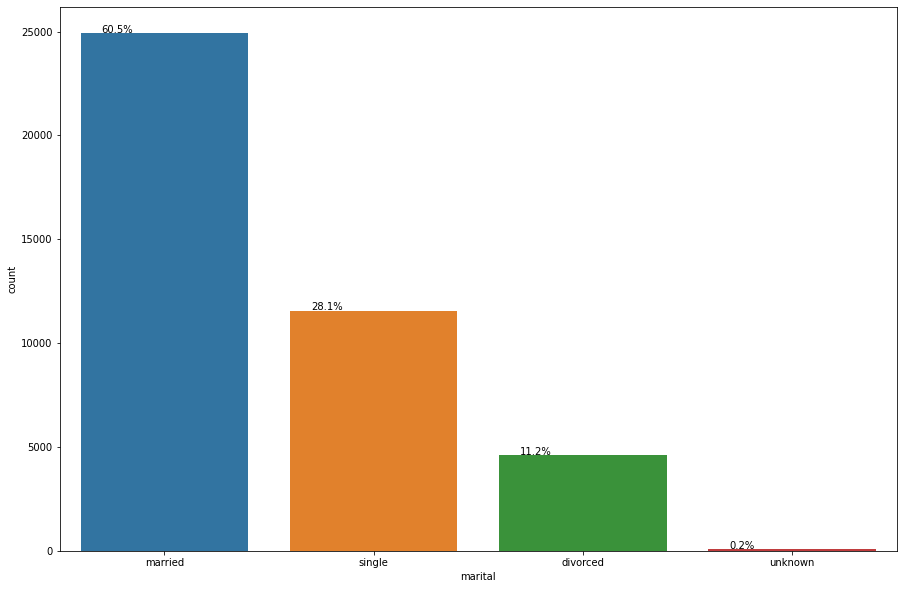

In [ ]:
countplot("marital", data)

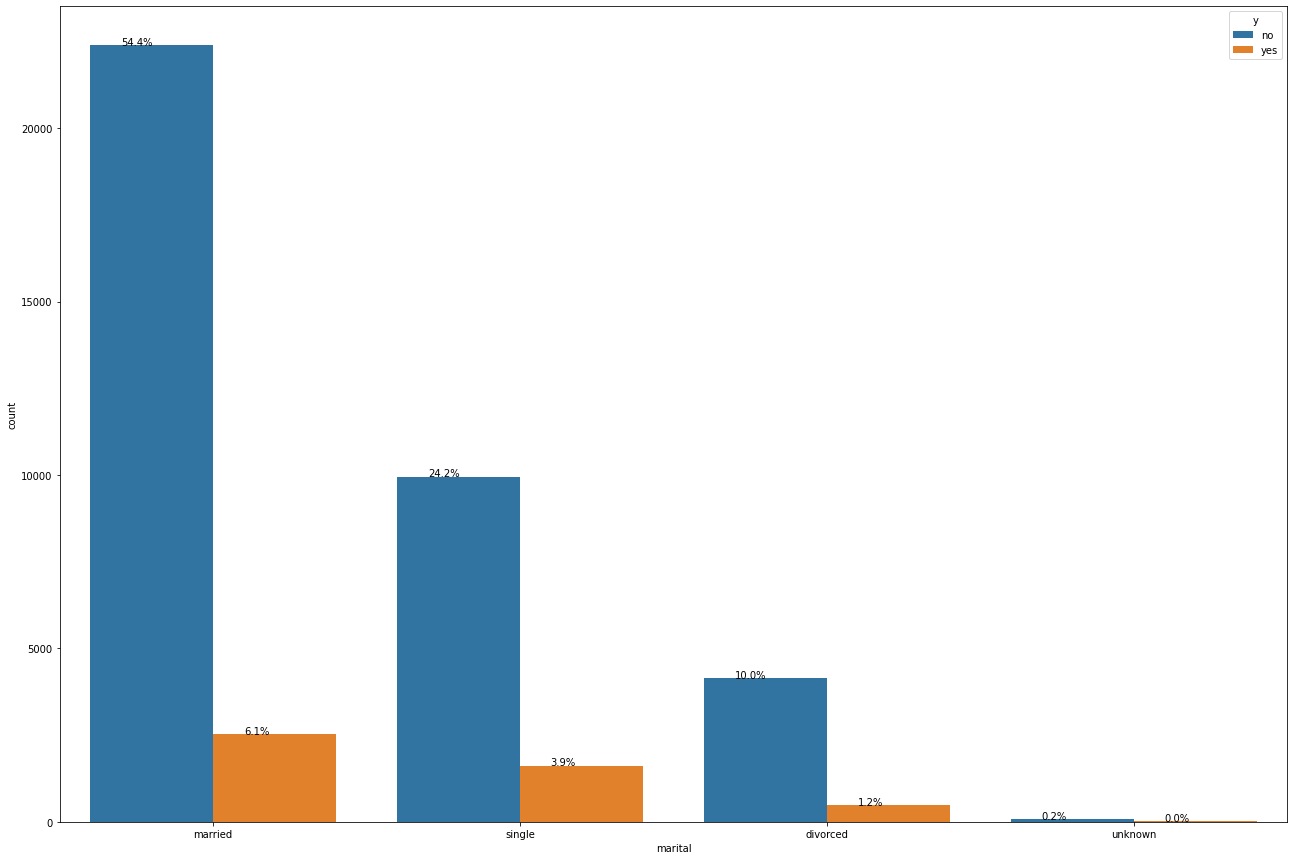

In [ ]:
countplot_withY("marital", data)

###Feature = default (categorical)
* This is a categorical feature which means "has credit in default", with the values "yes" and "no" and "unknown".

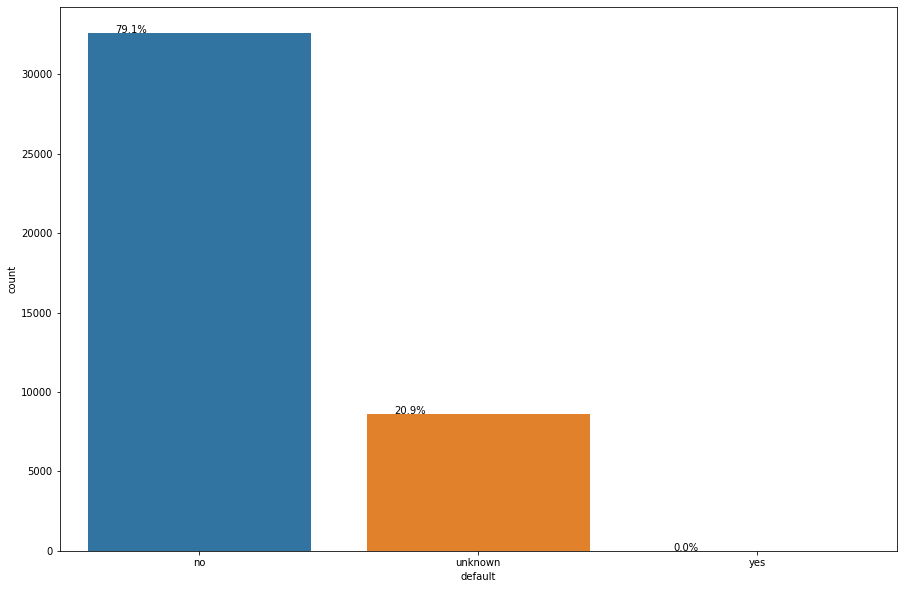

In [ ]:
countplot("default", data)

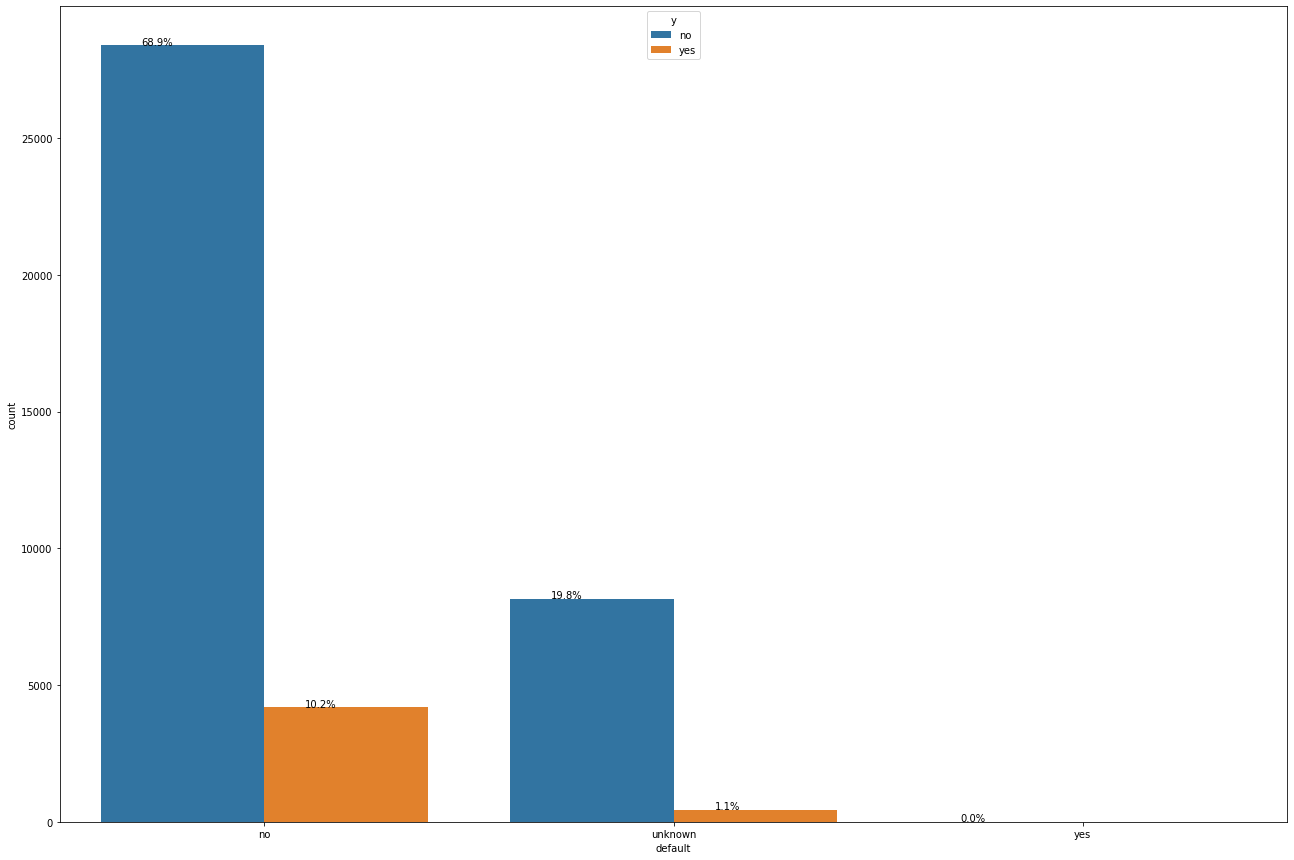

In [ ]:
countplot_withY("default", data)

There is no customer with who has credit in default. Majority of the customers don't have, and the for the rest of the customers this field is unknown.

###Feature = Education

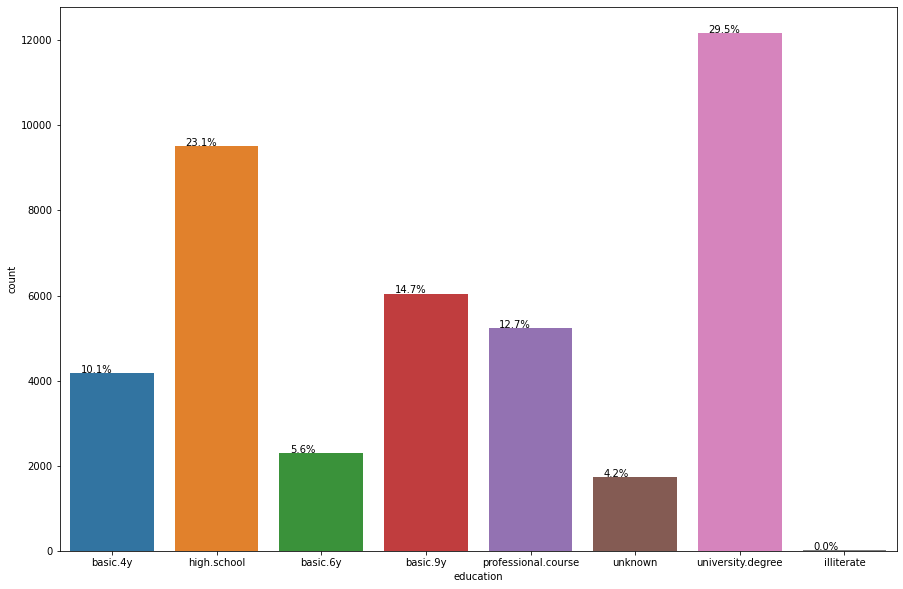

In [ ]:
countplot("education",data)

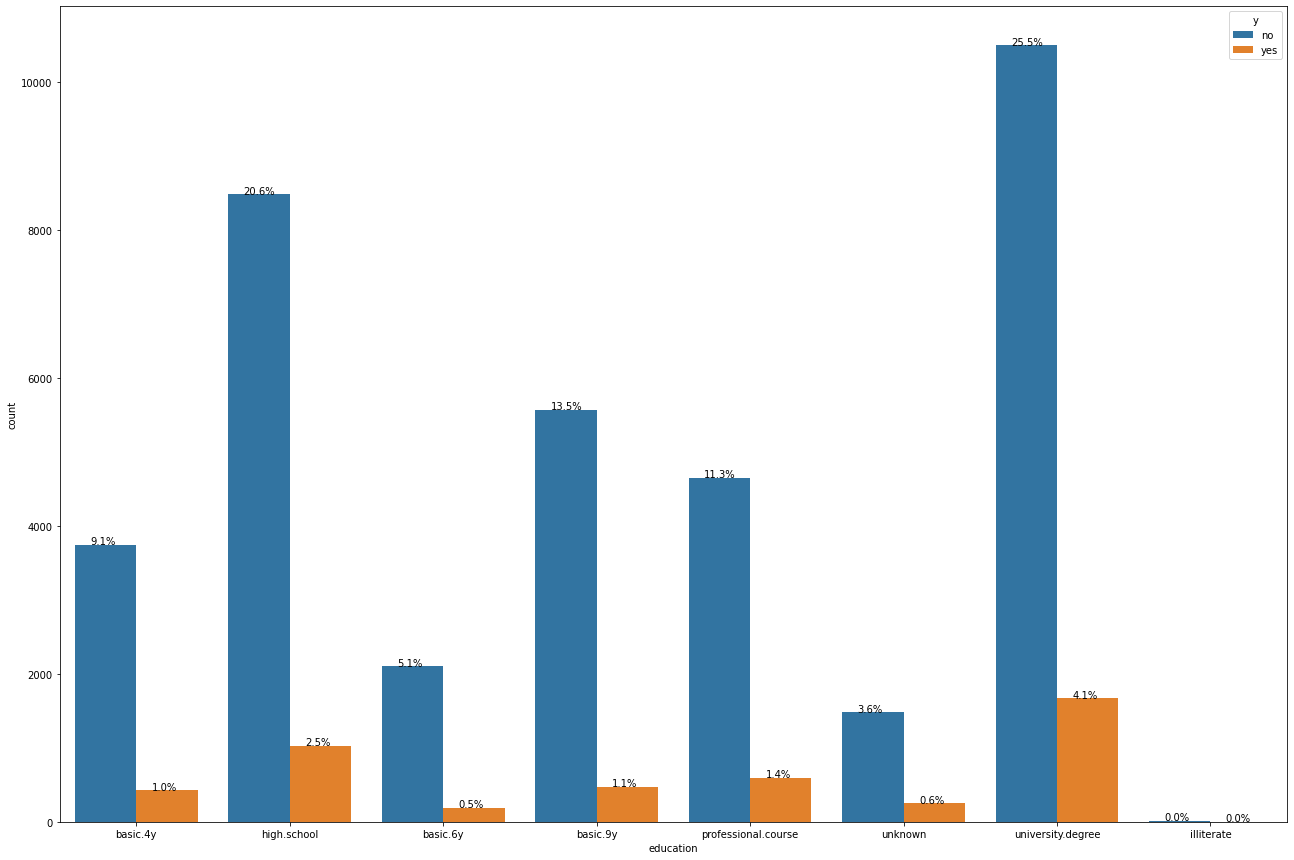

In [ ]:
countplot_withY("education", data)

###Feature = housing (Categorical)

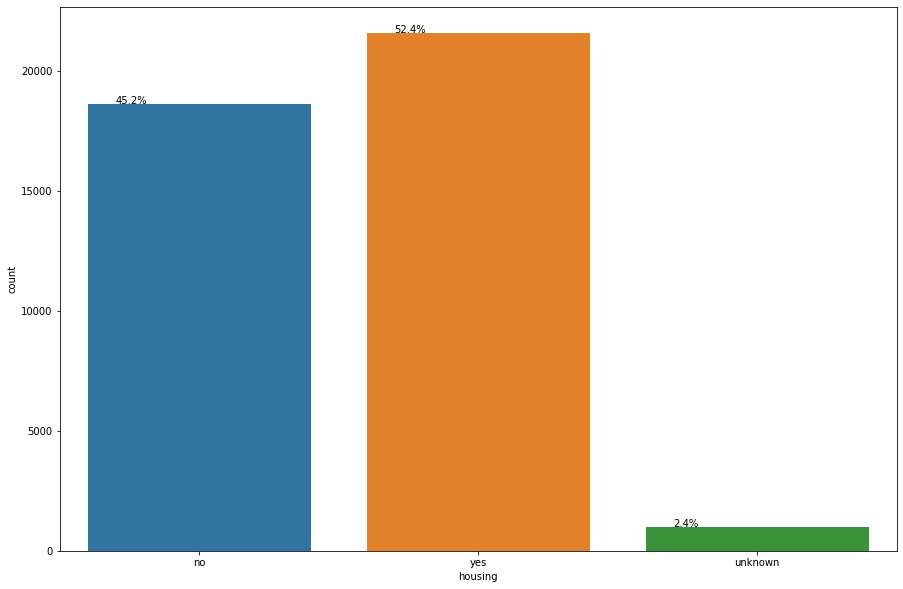

In [ ]:
countplot("housing", data)

Majority of the customers have a housing loan.

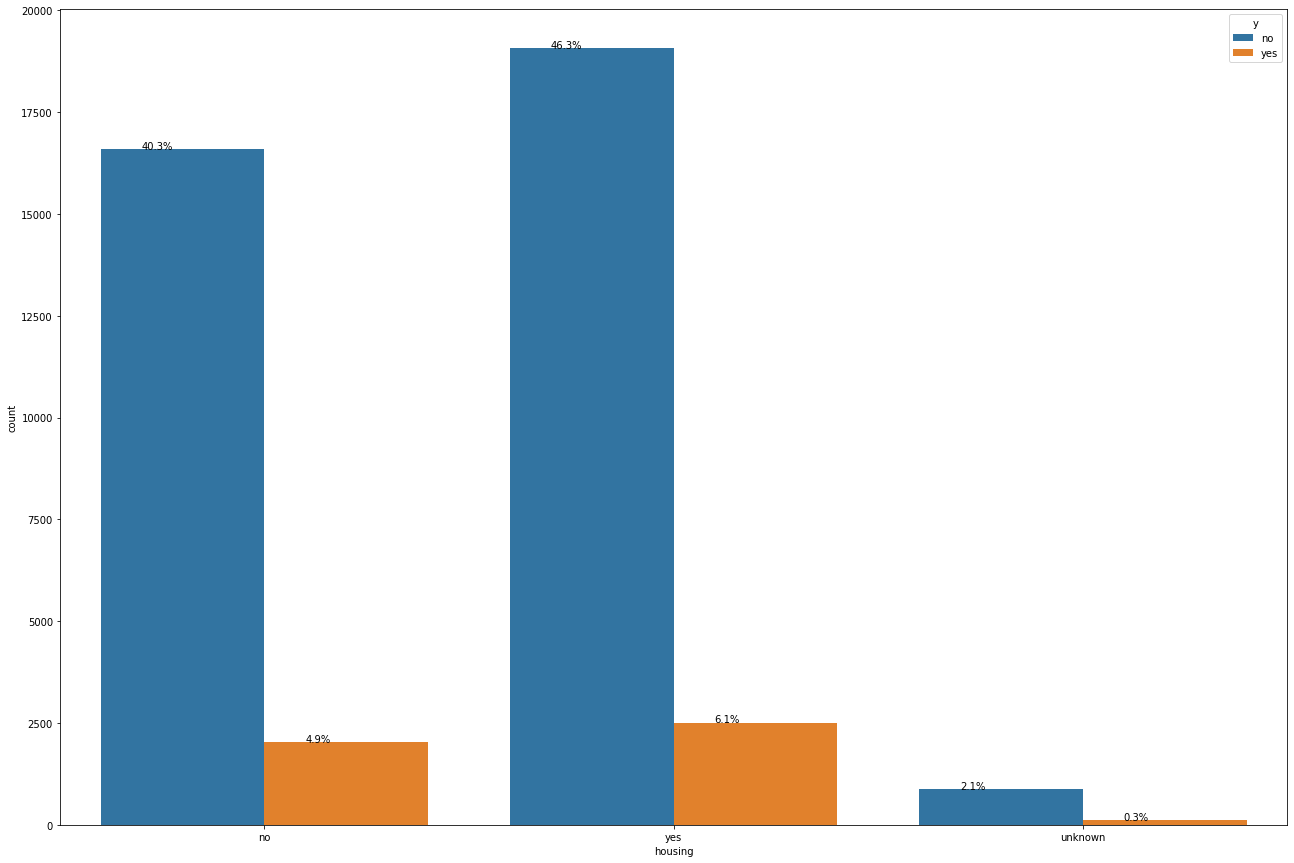

In [ ]:
countplot_withY("housing", data)

###Feature = loan (Categorical)

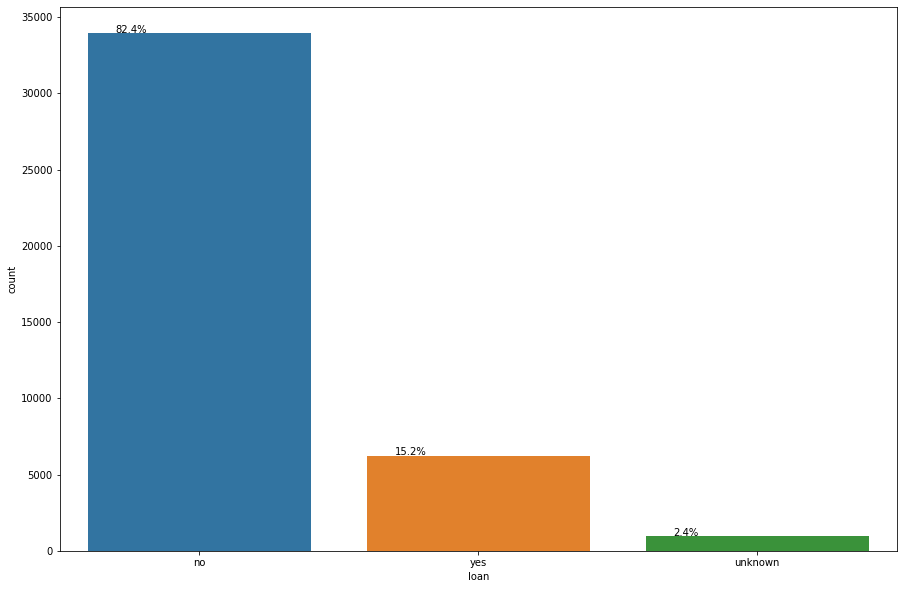

In [ ]:
countplot("loan", data)

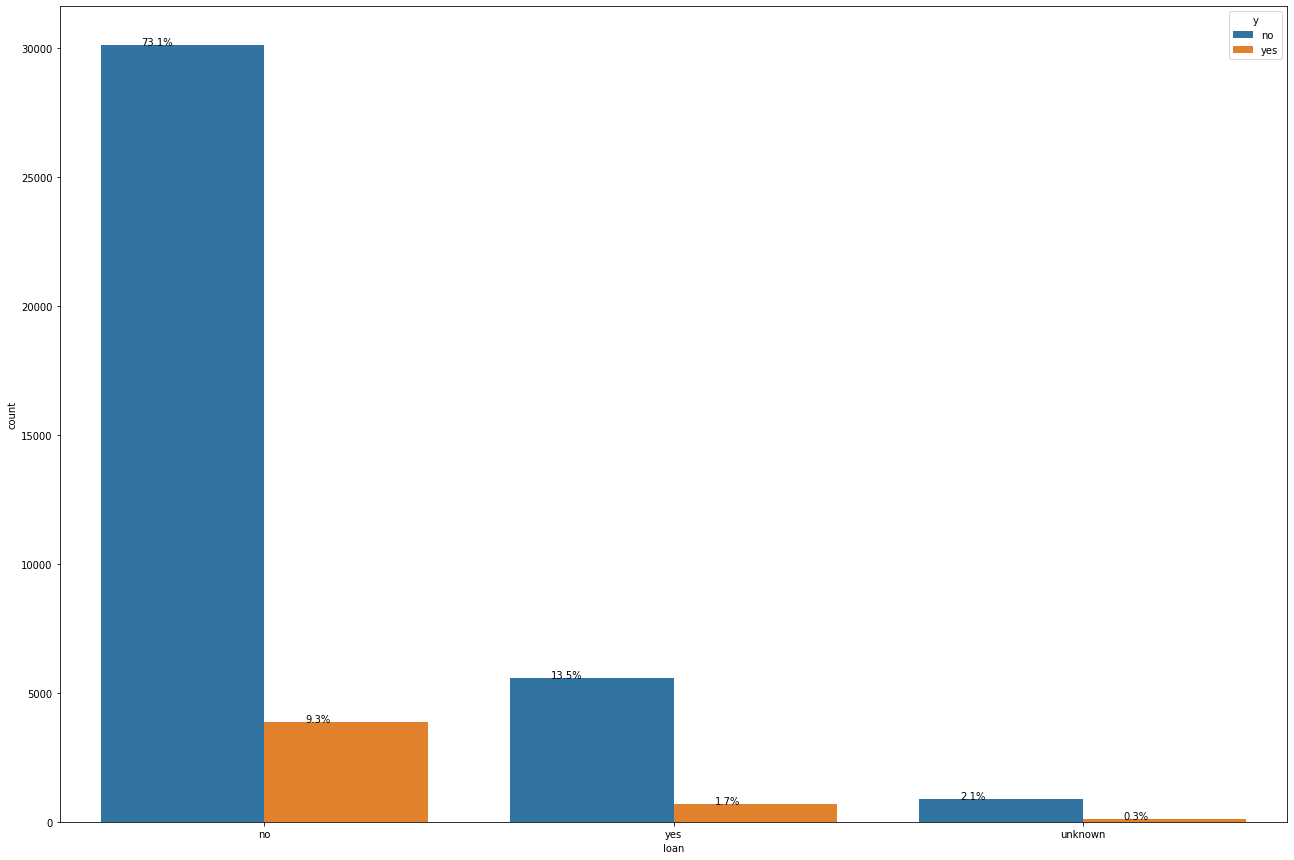

In [ ]:
countplot_withY("loan", data)

###Feature = contact (Categorical)

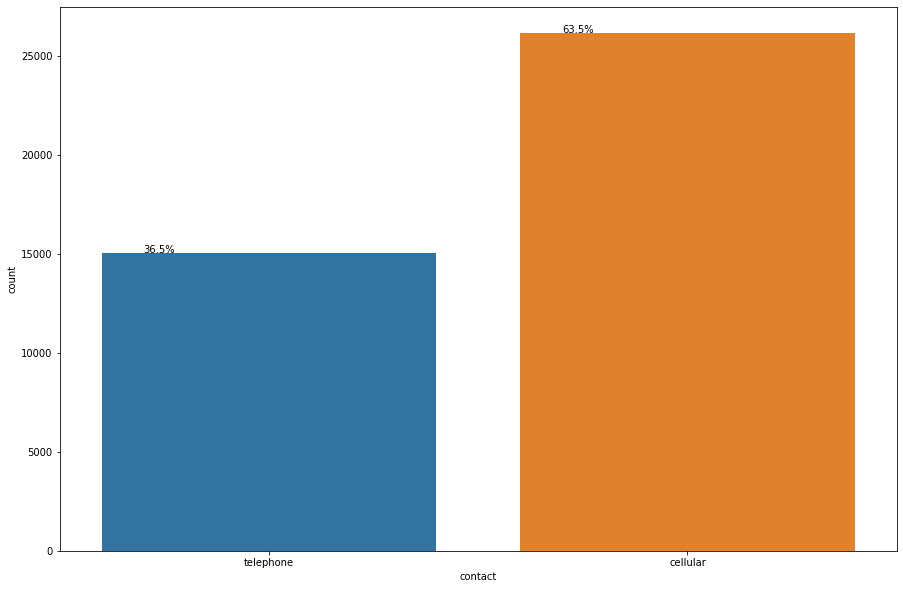

In [ ]:
countplot("contact", data)

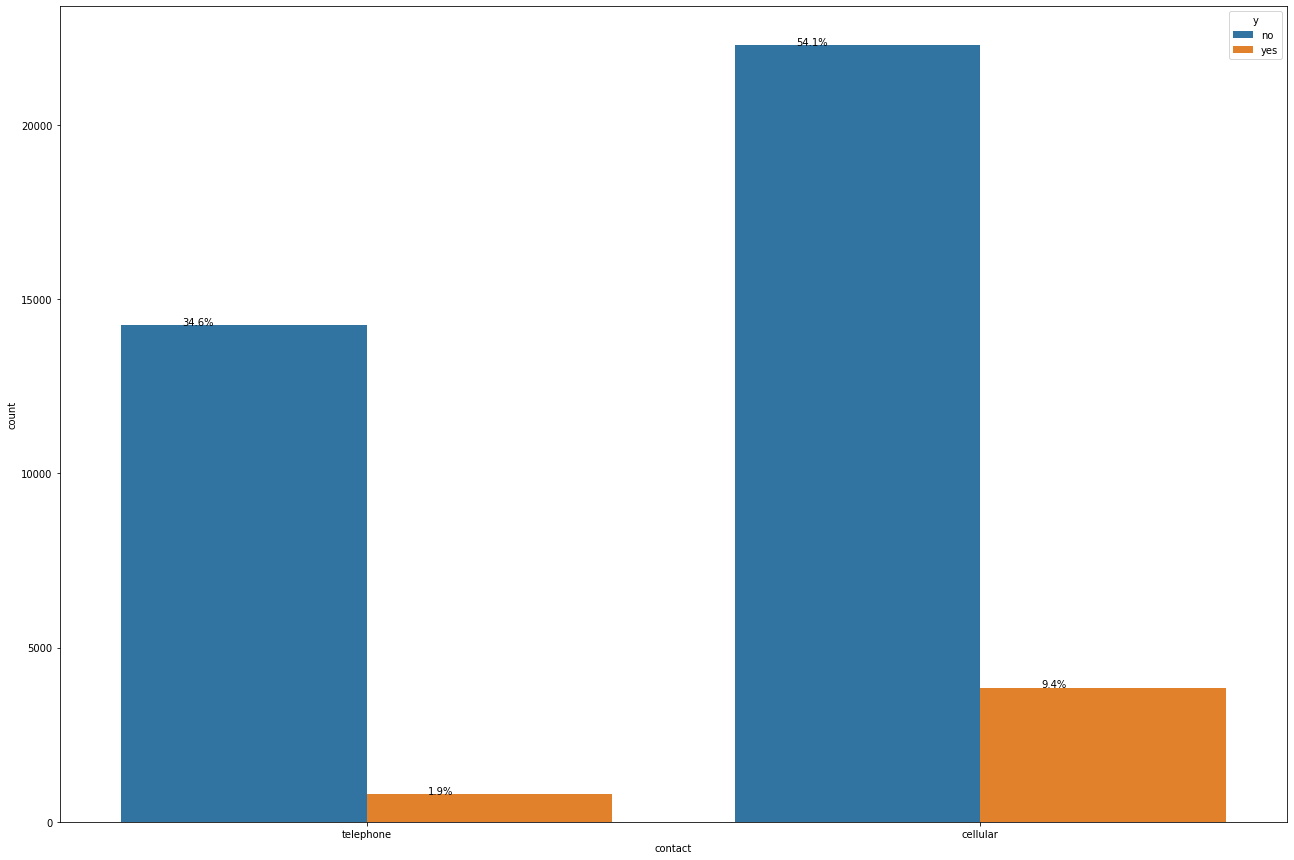

In [ ]:
countplot_withY("contact", data)

###Feature = month (Categorical)

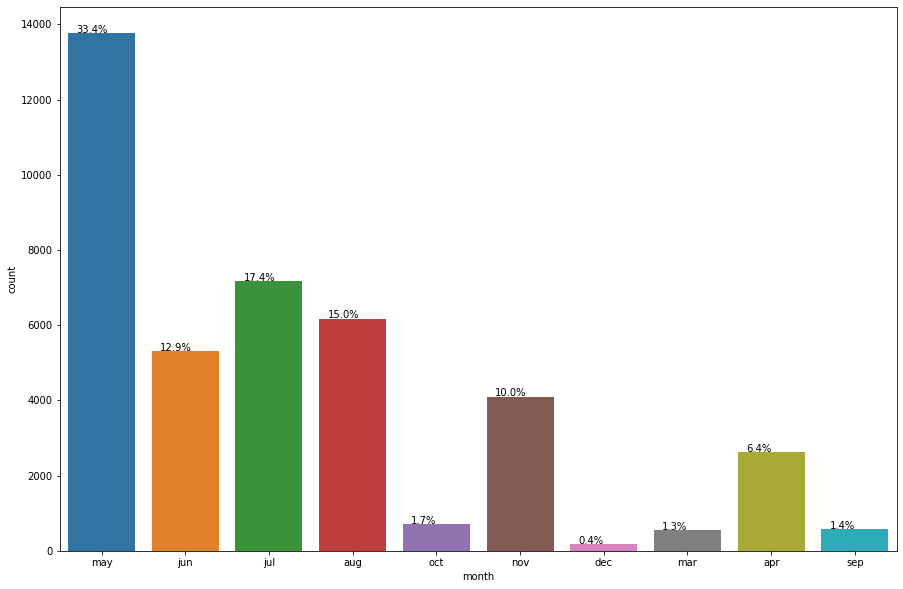

In [ ]:
countplot("month", data)

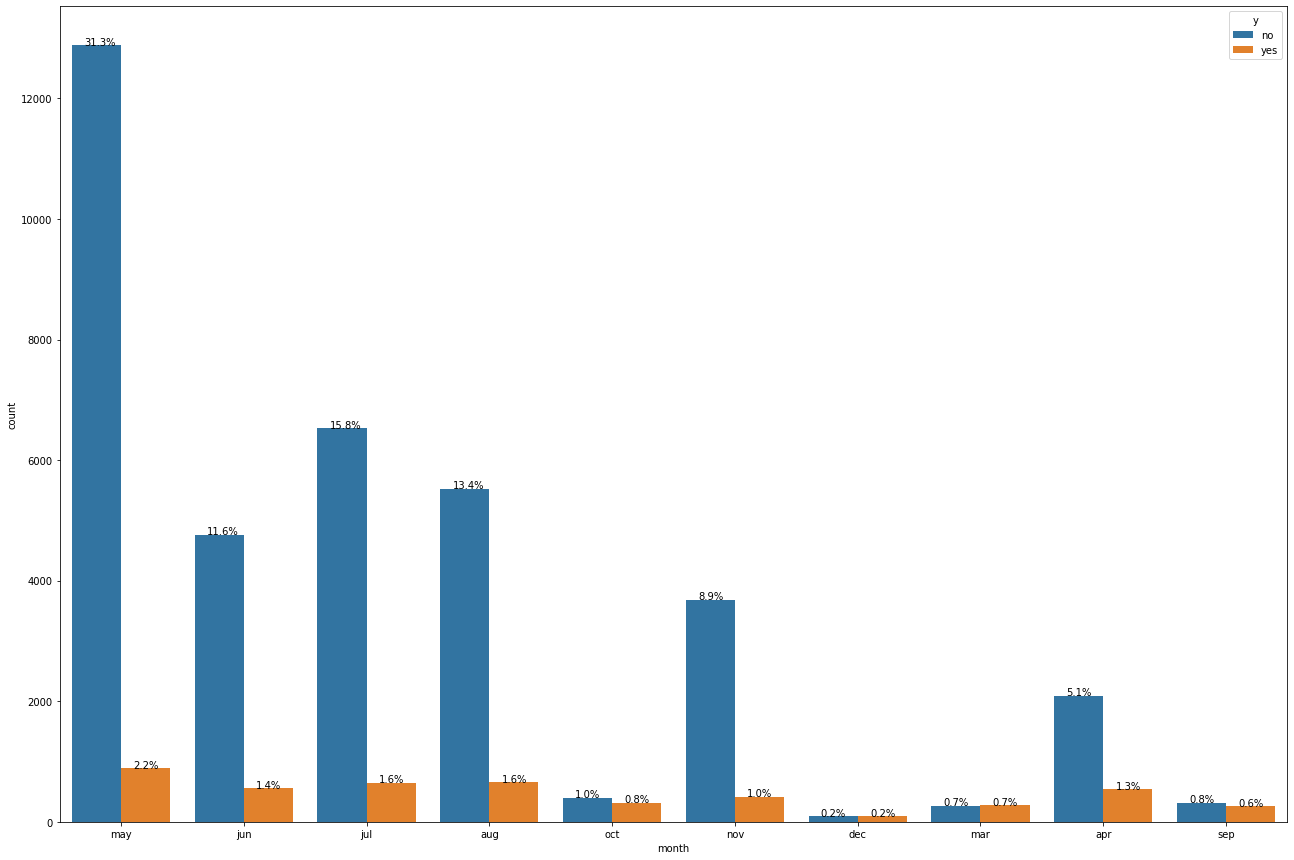

In [ ]:
countplot_withY("month", data)

###Feature = day_of_week (Categorical)

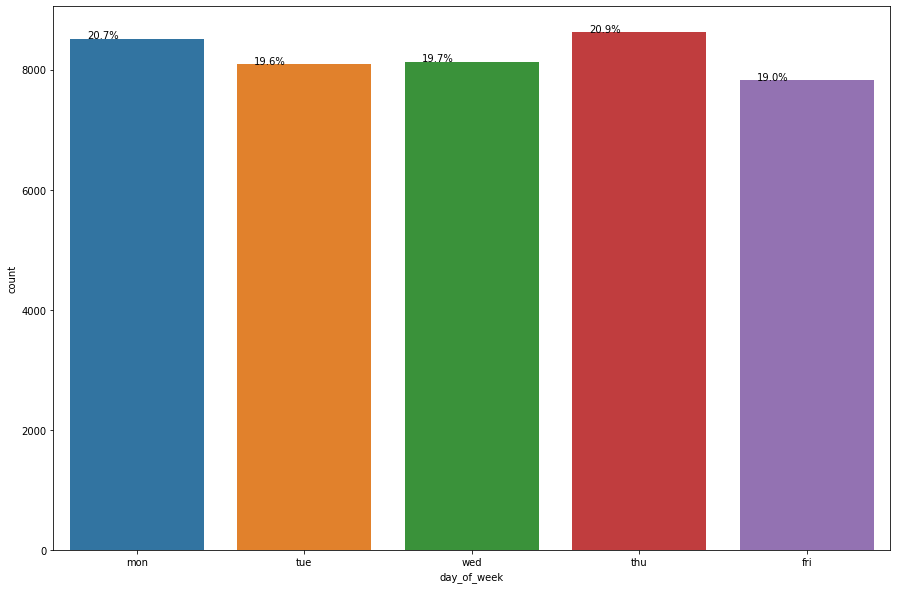

In [ ]:
countplot("day_of_week", data)

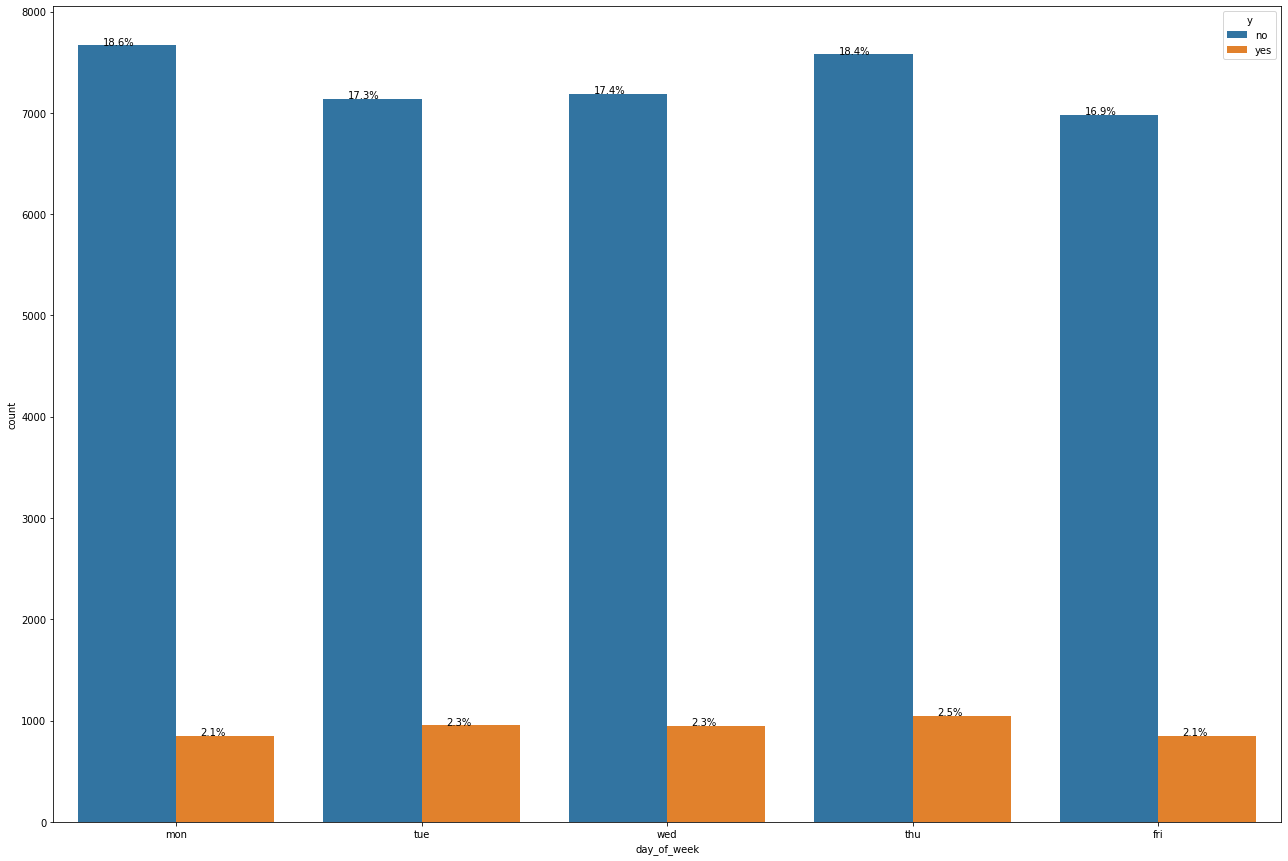

In [ ]:
countplot_withY("day_of_week", data)

#####The day of the week seems to be irrelevent as we have the same amount of data for all the days of the week, and no:yes ratio is also almost same.
 

###Feature = poutcome (Categorical)

This feature indicates the outcome of the previous marketing campaign

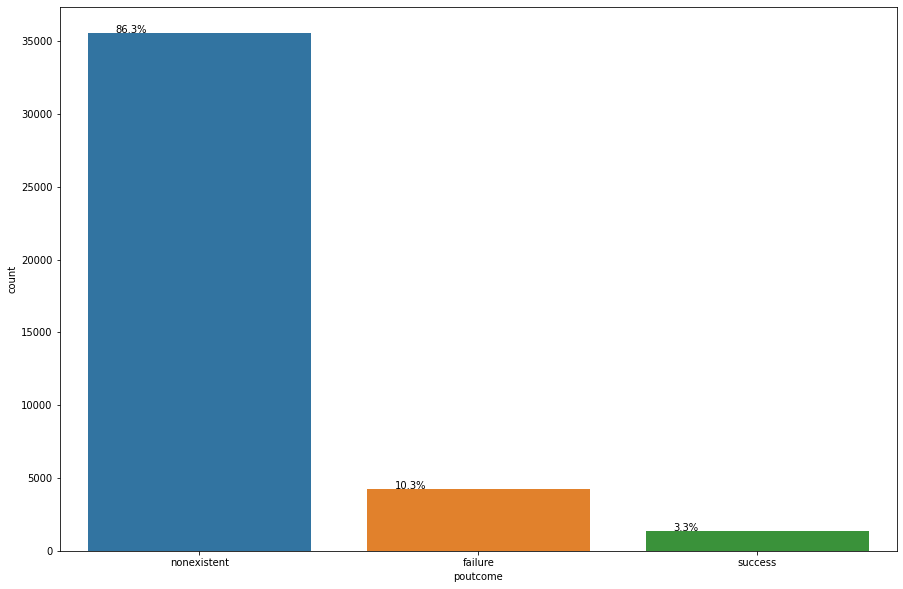

In [ ]:
countplot("poutcome", data)

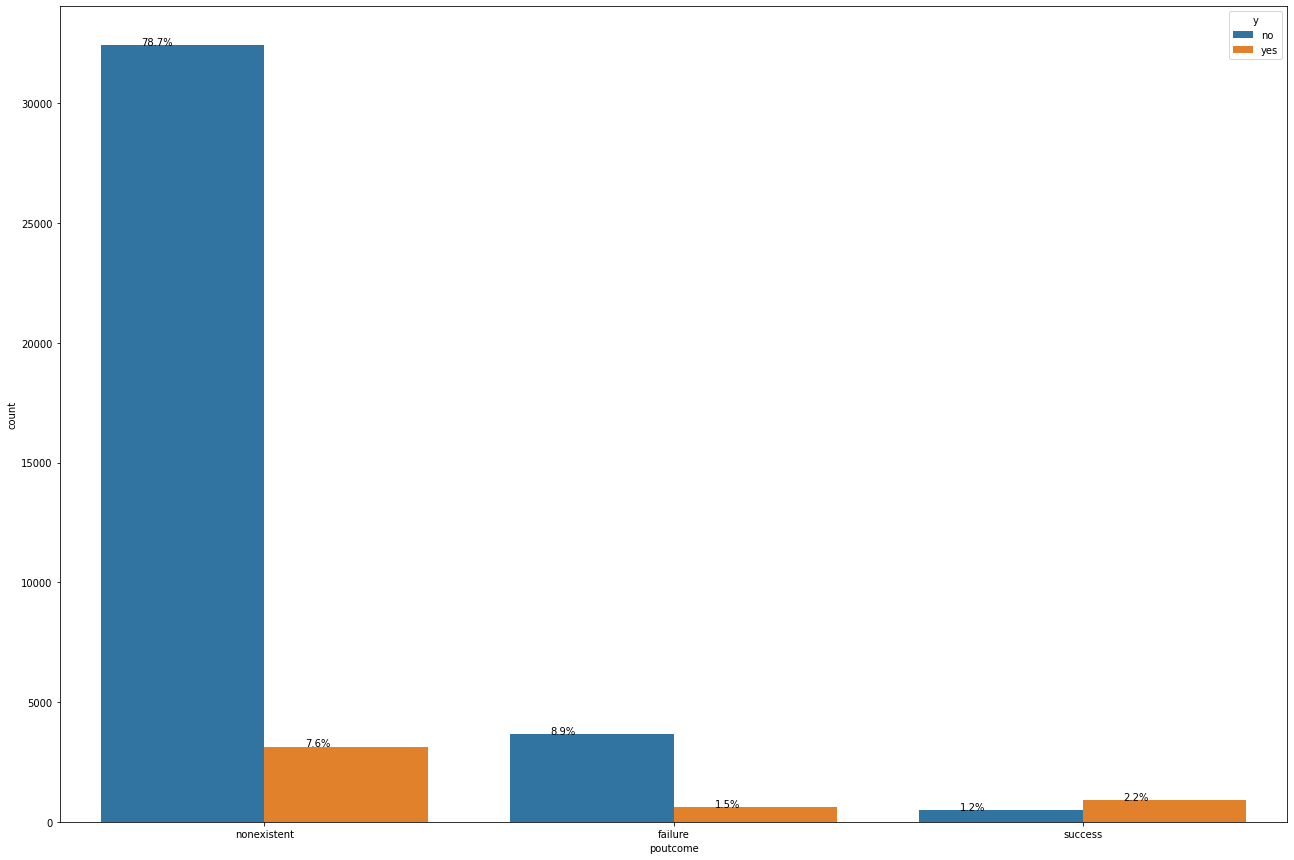

In [ ]:
countplot_withY("poutcome", data)

###Feature = Age (Numeric)

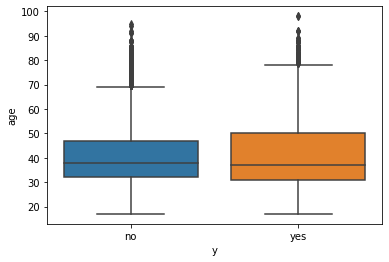

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


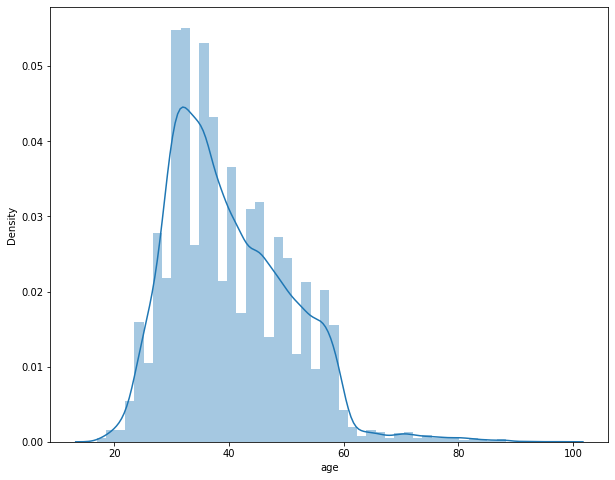

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

###Feature = duration (numeric)

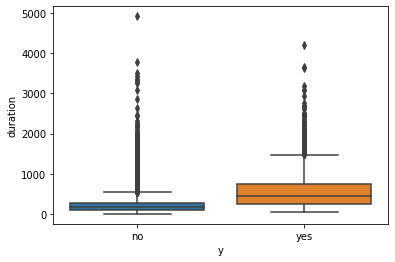

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration")
plt.show()

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


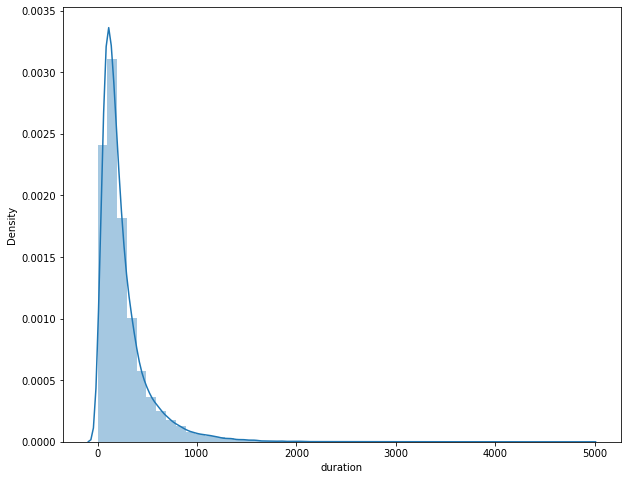

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data["duration"])
plt.show()

This seems like a powerlaw distribution where most the values are very low and very few have high values.

###Feature = pdays (numeric)

In [ ]:
data["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [ ]:
data["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Most of the values are 999, which means that the most of the customers have never been contacted before.

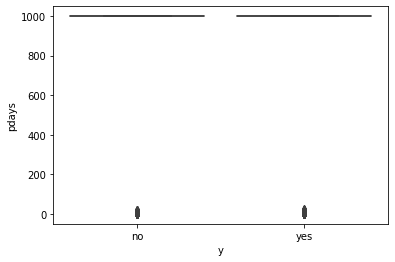

In [ ]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="pdays")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


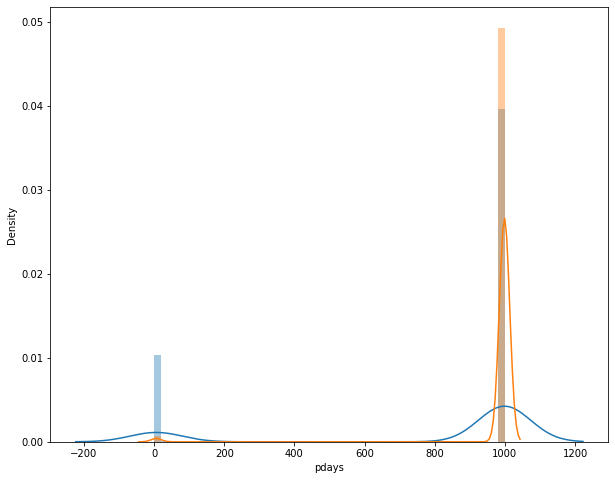

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["pdays"])
sns.distplot(data[data["y"]=="no"]["pdays"])
plt.show()

###Feature: previous (numeric)

In [ ]:
data["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
data[data["y"]=="yes"]["previous"].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous, dtype: int64

In [ ]:
data[data["y"]=="no"]["previous"].value_counts()

0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


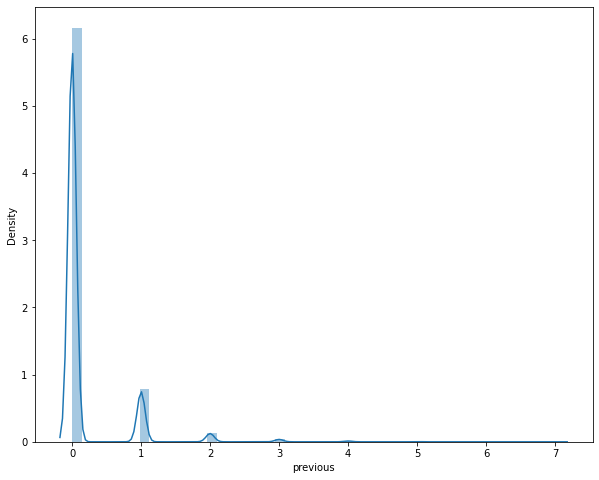

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["previous"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


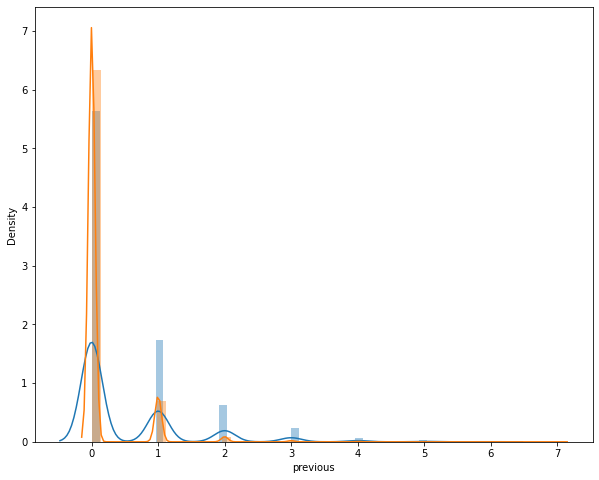

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["previous"])
sns.distplot(data[data["y"]=="no"]["previous"])


The previous feature is very similarly distributed for both the classes in the target variable. From basic EDA it is not sure how much value this individual feature have on the target variable

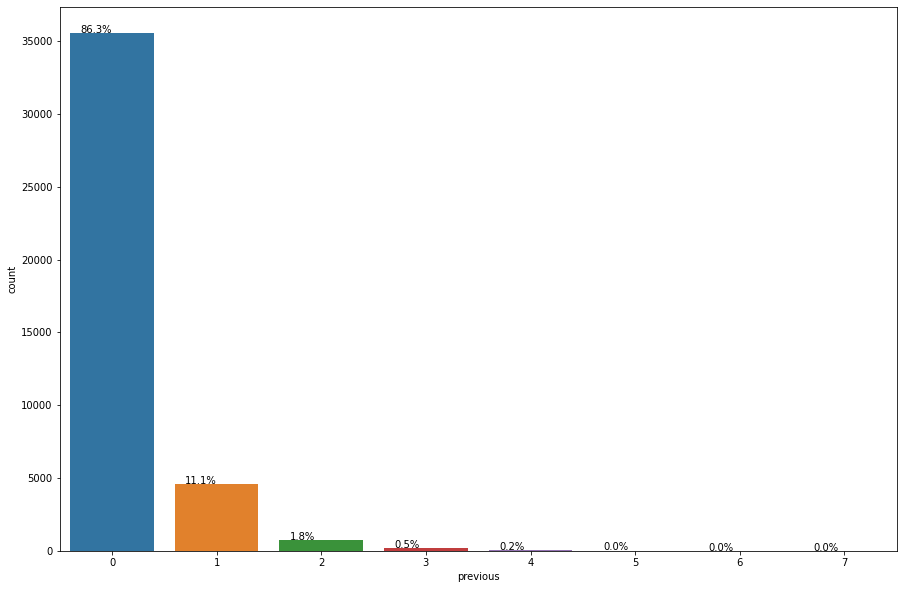

In [ ]:
countplot("previous", data)

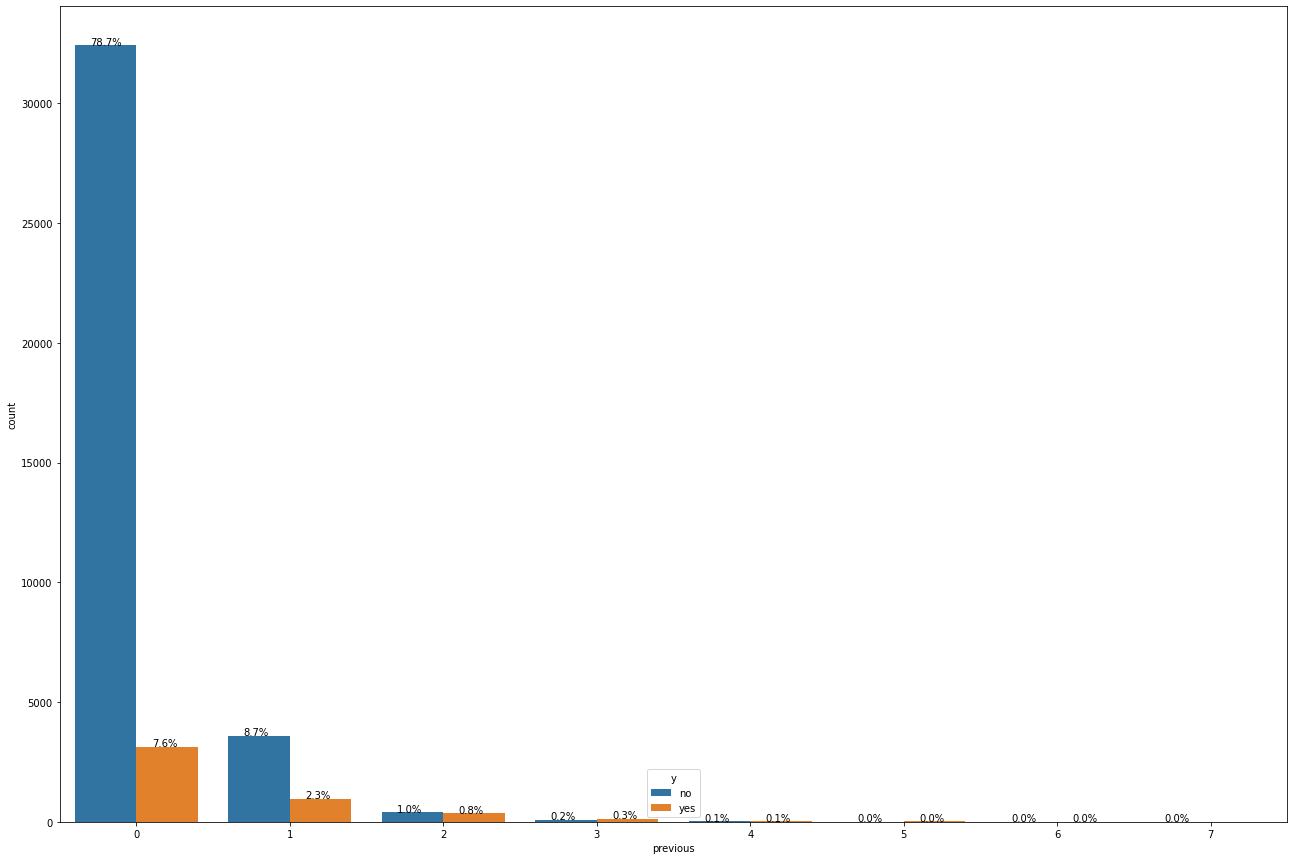

In [ ]:
countplot_withY("previous", data)

###Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

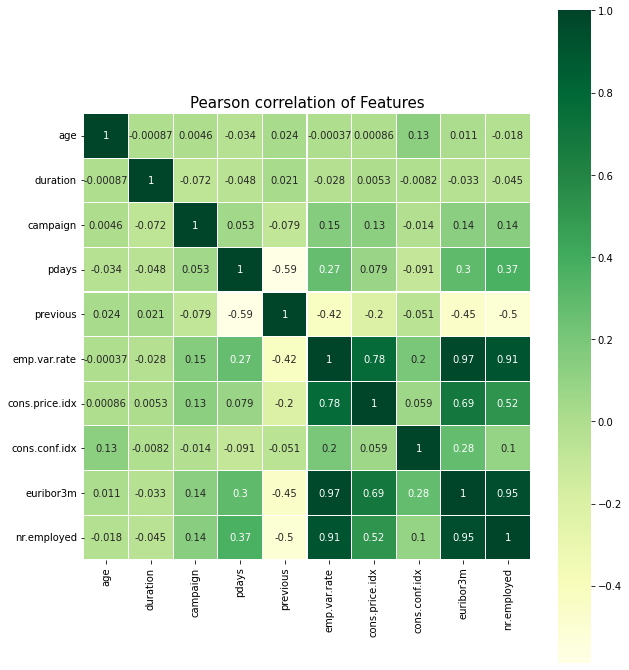

In [ ]:
corr = data.corr()
f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Pearson correlation of Features", y=1.05, size=15)


From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions